In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas_datareader import data

# 그래프에 대한 기본설정
# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['font.size'] = 16
plt.rcParams['axes.unicode_minus'] = False

### 맛집 데이터 불러오기

In [2]:
# 데이터를 읽어온다.
matzip = pd.read_csv('data/matzipData.csv')
matzip

,Restaurant Name,Rating,Address,Tel,Food,Price,Parking,Operating Time,Holiday
0,이나니와요스케,4.4,서울시 중구 을지로1가 192-11,02-772-9994,라멘 / 소바 / 우동,만원-2만원,주차공간없음,11:00 - 23:00,일
1,바오차이,4.4,서울시 중구 을지로2가 203,02-6031-0107,정통 중식 / 일반 중식,2만원-3만원,유료주차 가능,11:30 - 21:30,NaN
2,라칸티나,4.4,서울시 중구 을지로1가 50,02-777-2579,이탈리안,3만원-4만원,NaN,월-토: 11:30 - 23:00 일: 17:30 - 23:00,NaN
3,라세느,4.3,서울시 중구 소공동 1,02-317-7171,뷔페,4만원 이상,발렛,06:00 - 22:00,NaN
4,산수갑산,4.3,서울시 중구 인현동1가 15-4,02-2275-6654,탕 / 찌개 / 전골,만원 미만,유료주차 가능,월-금: 11:30 - 22:00 토: 11:30 - 20:00,일
...,...,...,...,...,...,...,...,...,...
395,누룩나무,4,서울시 종로구 관훈동 118-19,02-722-3398,전통 주점 / 포차,만원-2만원,주차공간없음,17:00 - 01:30,일
396,옴,4,서울시 종로구 신문로1가 2,02-723-4848,인도 음식,만원-2만원,주차공간없음,11:00 - 22:00,NaN
397,코블러,4,서울시 종로구 내자동 157,02-733-6421,칵테일 / 와인,만원-2만원,유료주차 가능,19:00 - 03:00,일
398,클류치,4,서울시 종로구 명륜3가 79-1,010-2702-1496,카페 / 디저트,만원 미만,주차공간없음,월-토: 10:00 - 23:00 일: 11:00 - 20:00,NaN


### 결측치처리

In [3]:
# 정보확인
matzip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Restaurant Name  400 non-null    object
 1   Rating           400 non-null    object
 2   Address          400 non-null    object
 3   Tel              350 non-null    object
 4   Food             400 non-null    object
 5   Price            397 non-null    object
 6   Parking          329 non-null    object
 7   Operating Time   364 non-null    object
 8   Holiday          126 non-null    object
dtypes: object(9)
memory usage: 28.2+ KB


In [4]:
# 결측치 확인
matzip.isna().sum()

Restaurant Name      0
Rating               0
Address              0
Tel                 50
Food                 0
Price                3
Parking             71
Operating Time      36
Holiday            274
dtype: int64

In [5]:
# 전화번호 결측치 처리
matzip['Tel'].fillna('번호없음', inplace=True)
matzip.isna().sum()

Restaurant Name      0
Rating               0
Address              0
Tel                  0
Food                 0
Price                3
Parking             71
Operating Time      36
Holiday            274
dtype: int64

In [6]:
# 가격 결측치 처리
# 가격 데이터 확인
matzip['Price'].value_counts()

만원-2만원     161
만원 미만      159
2만원-3만원     46
4만원 이상      22
3만원-4만원      9
Name: Price, dtype: int64

In [7]:
# Price는 가장 많은 것으로 채워준다.
matzip['Price'].fillna('만원-2만원', inplace=True)
matzip.isna().sum()

Restaurant Name      0
Rating               0
Address              0
Tel                  0
Food                 0
Price                0
Parking             71
Operating Time      36
Holiday            274
dtype: int64

In [8]:
# Parking 확인
matzip['Parking'].value_counts()

주차공간없음                199
유료주차 가능                89
무료주차 가능                24
발렛                      8
유료주차 가능 2시간 무료          3
무료주차 가능 2시간 무료          2
유료주차 가능 주차권 2시간 제공      1
무료주차 가능 당일 무료           1
유료주차 가능 1시간 무료          1
유료주차 가능 1.5시간 무료        1
Name: Parking, dtype: int64

In [9]:
# Parking의 결측치는 "주차공간없음" 으로 채워준다.
matzip['Parking'].fillna('주차공간없음', inplace=True)
matzip.isna().sum()

Restaurant Name      0
Rating               0
Address              0
Tel                  0
Food                 0
Price                0
Parking              0
Operating Time      36
Holiday            274
dtype: int64

In [10]:
# 영업시간 데이터 확인
matzip['Operating Time'].value_counts()

11:00 - 22:00                            25
11:30 - 22:00                            15
11:30 - 21:30                            15
00:00 - 24:00                            12
11:00 - 23:00                            11
                                         ..
월-목: 18:00 - 24:00 금-토: 18:00 - 02:00     1
10:00 - 01:00                             1
월-토: 11:00 - 03:00 일: 11:00 - 23:00       1
16:00 - 06:00                             1
월-금: 10:30 - 21:00 토-일: 10:30 - 22:00     1
Name: Operating Time, Length: 204, dtype: int64

In [11]:
# 영업시간에 결측치가 있는 행을 삭제한다.
matzip.dropna(subset=['Operating Time'], inplace=True)
matzip.isna().sum()

Restaurant Name      0
Rating               0
Address              0
Tel                  0
Food                 0
Price                0
Parking              0
Operating Time       0
Holiday            238
dtype: int64

In [12]:
# 휴일 데이터 확인
matzip['Holiday'].value_counts()

일                     75
월                     21
토, 일                   7
화                      3
일, 월                   2
수                      2
일, 첫째 월                2
둘째/넷째 일                2
월, 화                   2
둘째, 넷째 일               1
첫째, 셋째 월, 둘째, 넷째 일     1
월, 일                   1
월, 마지막 화               1
넷째 일, 월                1
월, 셋째 화                1
격주 월                   1
첫째/셋째 일                1
토-일                    1
토                      1
Name: Holiday, dtype: int64

In [13]:
# 휴일 컬럼을 제거한다.
matzip.drop('Holiday', axis=1, inplace=True)
matzip.isna().sum()

Restaurant Name    0
Rating             0
Address            0
Tel                0
Food               0
Price              0
Parking            0
Operating Time     0
dtype: int64

### 데이터 처리

In [14]:
# 가격
matzip['Price'].value_counts()

만원-2만원     152
만원 미만      137
2만원-3만원     44
4만원 이상      22
3만원-4만원      9
Name: Price, dtype: int64

In [15]:
# 만원이라는 글자를 10000 로변경한다.
matzip['Price2'] = matzip['Price'].str.replace('만원', '10000')
# 미만을 제거한다.
matzip['Price2'] = matzip['Price2'].str.replace('미만', '')
# 이상을 제거한다.
matzip['Price2'] = matzip['Price2'].str.replace('이상', '')
# -210000 을 -20000으로 변경한다.
matzip['Price2'] = matzip['Price2'].str.replace('-210000', '-20000')
# -310000 을 -30000으로 변경한다.
matzip['Price2'] = matzip['Price2'].str.replace('-310000', '-30000')
# -410000 을 -40000으로 변경한다.
matzip['Price2'] = matzip['Price2'].str.replace('-410000', '-40000')
# 310000- 을 제거한다.
matzip['Price2'] = matzip['Price2'].str.replace('310000-', '')
# 210000- 을 제거한다.
matzip['Price2'] = matzip['Price2'].str.replace('210000-', '')
# 10000- 을 제거한다.
matzip['Price2'] = matzip['Price2'].str.replace('10000-', '')
# 410000 을 50000으로 변경한다.
matzip['Price2'] = matzip['Price2'].str.replace('410000', '50000')
# 좌우 공백을 제거한다.
matzip['Price2'].str.strip()

matzip['Price2'].value_counts()

20000     152
10000     137
30000      44
50000      22
40000       9
Name: Price2, dtype: int64

In [16]:
# Price2의 타입을 확인한다.
# dtype('0')은 숫자로 구성된 문자열을 의미한다.
matzip['Price2'].dtype

dtype('O')

In [17]:
# 정수형으로 변환한다.
matzip['Price2'] = matzip['Price2'].astype('int64')
matzip['Price2'].dtype

dtype('int64')

In [18]:
dict1 = {
    '만원-2만원' : 20000,
    '만원 미만' : 10000,
    '2만원-3만원' : 30000,
    '4만원 이상' : 50000,
    '3만원-4만원' : 40000
}

matzip['Price3'] = matzip['Price'].map(dict1)
matzip['Price3'].value_counts()

20000    152
10000    137
30000     44
50000     22
40000      9
Name: Price3, dtype: int64

In [19]:
matzip

,Restaurant Name,Rating,Address,Tel,Food,Price,Parking,Operating Time,Price2,Price3
0,이나니와요스케,4.4,서울시 중구 을지로1가 192-11,02-772-9994,라멘 / 소바 / 우동,만원-2만원,주차공간없음,11:00 - 23:00,20000,20000
1,바오차이,4.4,서울시 중구 을지로2가 203,02-6031-0107,정통 중식 / 일반 중식,2만원-3만원,유료주차 가능,11:30 - 21:30,30000,30000
2,라칸티나,4.4,서울시 중구 을지로1가 50,02-777-2579,이탈리안,3만원-4만원,주차공간없음,월-토: 11:30 - 23:00 일: 17:30 - 23:00,40000,40000
3,라세느,4.3,서울시 중구 소공동 1,02-317-7171,뷔페,4만원 이상,발렛,06:00 - 22:00,50000,50000
4,산수갑산,4.3,서울시 중구 인현동1가 15-4,02-2275-6654,탕 / 찌개 / 전골,만원 미만,유료주차 가능,월-금: 11:30 - 22:00 토: 11:30 - 20:00,10000,10000
...,...,...,...,...,...,...,...,...,...,...
395,누룩나무,4,서울시 종로구 관훈동 118-19,02-722-3398,전통 주점 / 포차,만원-2만원,주차공간없음,17:00 - 01:30,20000,20000
396,옴,4,서울시 종로구 신문로1가 2,02-723-4848,인도 음식,만원-2만원,주차공간없음,11:00 - 22:00,20000,20000
397,코블러,4,서울시 종로구 내자동 157,02-733-6421,칵테일 / 와인,만원-2만원,유료주차 가능,19:00 - 03:00,20000,20000
398,클류치,4,서울시 종로구 명륜3가 79-1,010-2702-1496,카페 / 디저트,만원 미만,주차공간없음,월-토: 10:00 - 23:00 일: 11:00 - 20:00,10000,10000


In [20]:
# Rating 확인
matzip['Rating'].value_counts()

-      132
4       51
4.1     43
4.2     37
4.3     37
4.4     20
4.5      8
3.9      7
3.7      5
3.3      5
4.6      5
3.6      4
4.7      3
3.4      3
3.8      2
3.1      1
2.7      1
Name: Rating, dtype: int64

In [21]:
# Food
matzip['Food'].value_counts()

카페 / 디저트            58
고기 요리               39
한정식 / 백반 / 정통 한식    23
이탈리안                23
탕 / 찌개 / 전골         21
기타 한식               17
치킨 / 호프 / 펍         14
국수 / 면 요리           14
베이커리                11
칵테일 / 와인            10
닭 / 오리 요리           10
세계음식 기타              9
정통 중식 / 일반 중식        9
브런치 / 버거 / 샌드위치      9
정통 일식 / 일반 일식        8
해산물 요리               7
라멘 / 소바 / 우동         6
회 / 스시               6
기타 중식                6
인도 음식                5
일반 주점                5
스테이크 / 바베큐           5
베트남 음식               5
돈부리 / 일본 카레 / 벤토     5
까스 요리                4
기타 일식                4
다국적 아시아 음식           3
프랑스 음식               3
퓨전 양식                3
뷔페                   3
전통 주점 / 포차           3
기타 양식                3
태국 음식                3
퓨전 중식                2
퓨전 일식                2
이자카야 / 오뎅 / 꼬치       2
남미 음식                2
패밀리 레스토랑             1
딤섬 / 만두              1
Name: Food, dtype: int64

### 데이터 분석

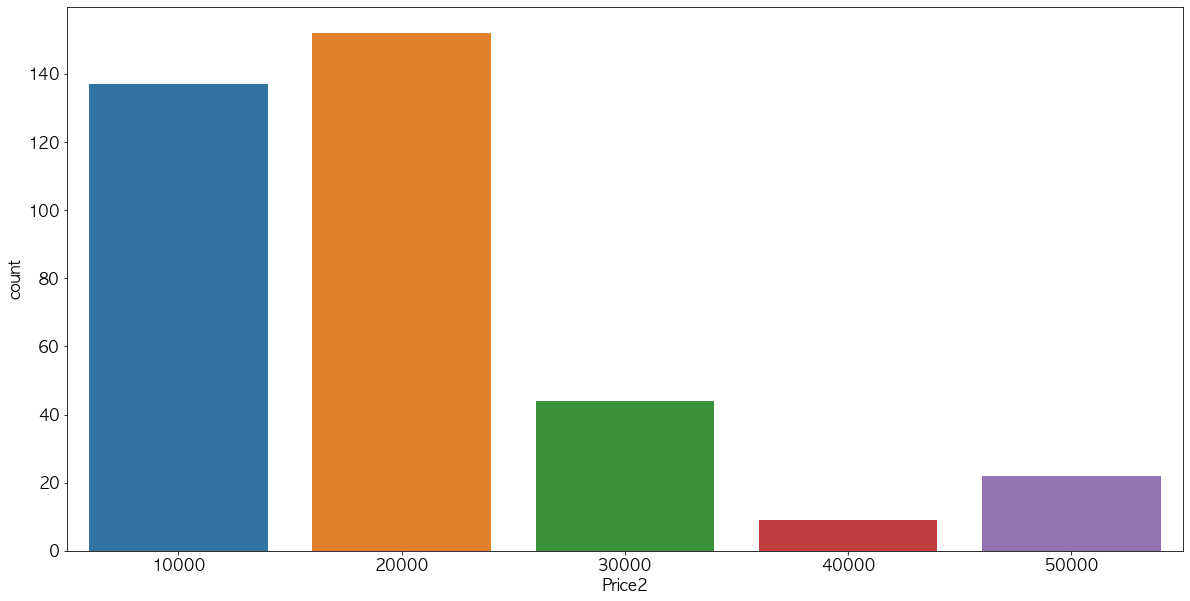

In [22]:
# 가격 분포를 확인한다.
sns.countplot(data=matzip, x='Price2')
plt.show()

### 주차 공간과 평점간의 관계

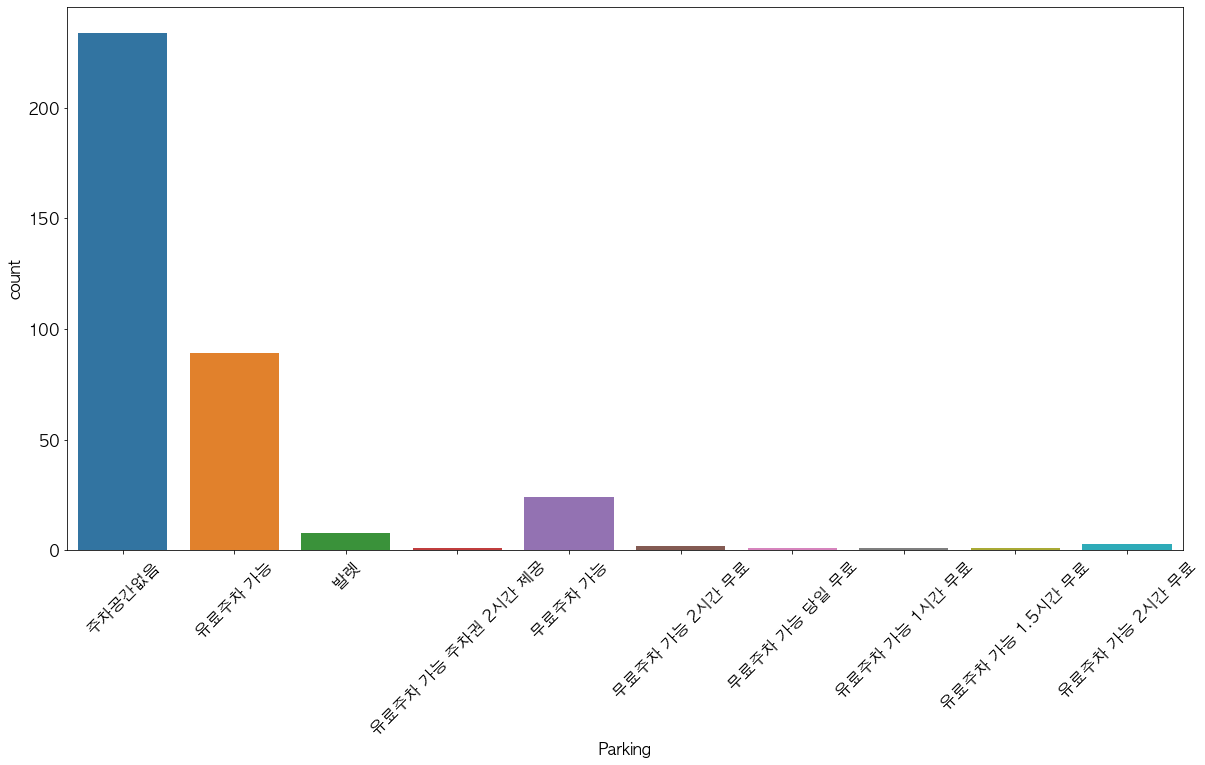

In [23]:
# 시각화
sns.countplot(data=matzip, x='Parking')

plt.xticks(rotation=45)

plt.show()

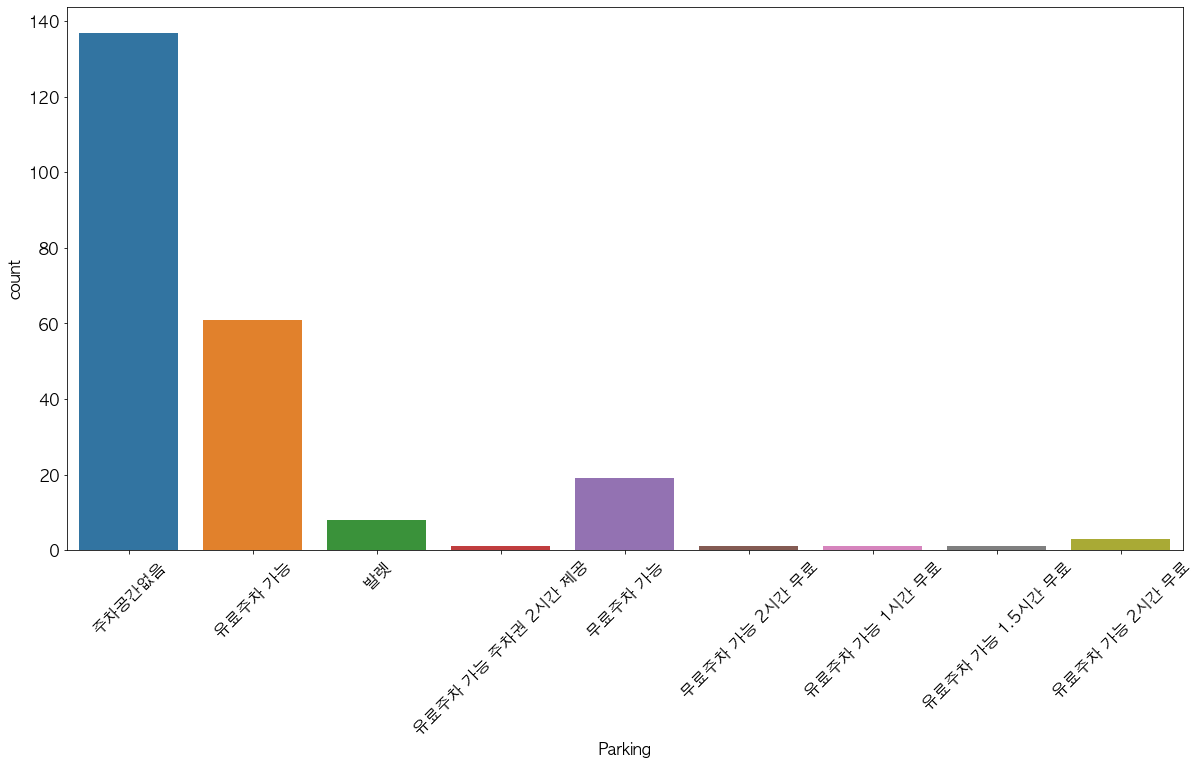

In [24]:
# Rating 이 - 가 아닌 식당들의 주차 공간을 시각화 해본다.
a1 = matzip.query('Rating != "-"')
sns.countplot(data=a1, x='Parking')
plt.xticks(rotation=45)
plt.show()

In [25]:
# rating이 - 가 아닌 것에 대해 주차 공간을 기준으로 그룹을 묶고 평점의 평점을
# 구한다.
# 숫자 값으로 변환한다.
a1['Rating'] = a1['Rating'].astype('float64')

a2 = a1.groupby('Parking')['Rating'].mean()
a2

/var/folders/gr/n8_lnq3n4bq1z2j7w3hrtg_40000gn/T/ipykernel_9038/2580797802.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a1['Rating'] = a1['Rating'].astype('float64')


Parking
무료주차 가능               4.173684
무료주차 가능 2시간 무료        4.700000
발렛                    4.187500
유료주차 가능               4.090164
유료주차 가능 1.5시간 무료      4.400000
유료주차 가능 1시간 무료        4.400000
유료주차 가능 2시간 무료        4.066667
유료주차 가능 주차권 2시간 제공    4.100000
주차공간없음                4.117518
Name: Rating, dtype: float64

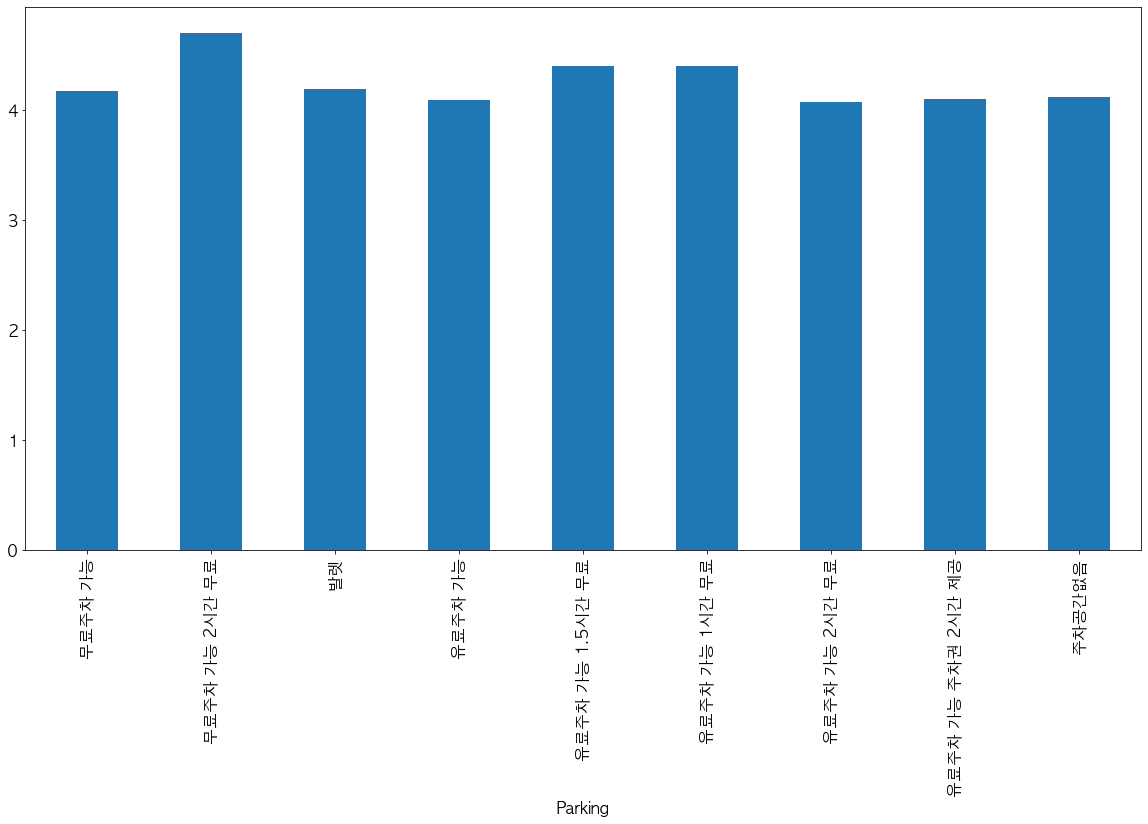

In [26]:
# Series를 통한 그래프 시각화
a2.plot.bar()
plt.show()

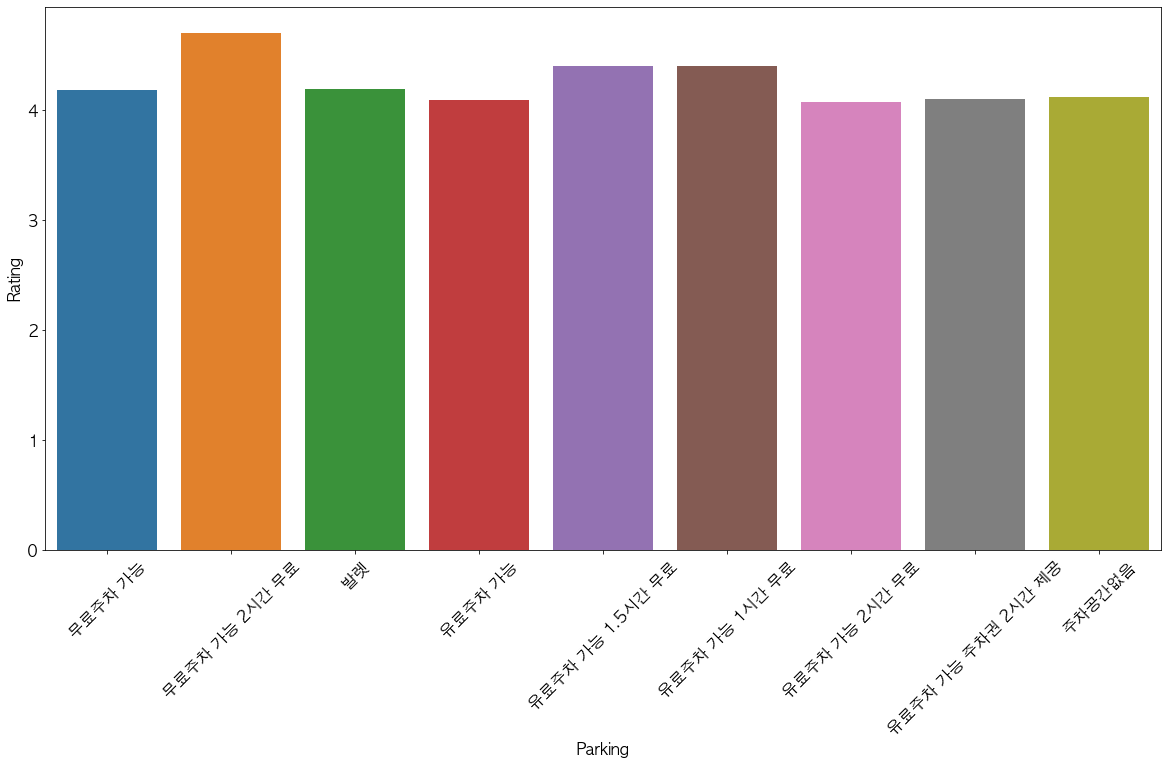

In [27]:
# 인덱스를 컬럼에 포함시킨다.
df100 = pd.DataFrame(a2)
df100.reset_index(inplace=True)

sns.barplot(data=df100, x='Parking', y='Rating')
plt.xticks(rotation=45)
plt.show()

In [28]:
# 가격 확인
a1['Price'].value_counts()

만원 미만      93
만원-2만원     92
2만원-3만원    25
4만원 이상     16
3만원-4만원     6
Name: Price, dtype: int64

In [29]:
# 가격을 기준으로 그룹을 묶고 평점 평균을 구한다.
a2 = a1.groupby('Price')['Rating'].mean()
a2

Price
2만원-3만원    4.152000
3만원-4만원    4.300000
4만원 이상     4.262500
만원 미만      4.061290
만원-2만원     4.138043
Name: Rating, dtype: float64

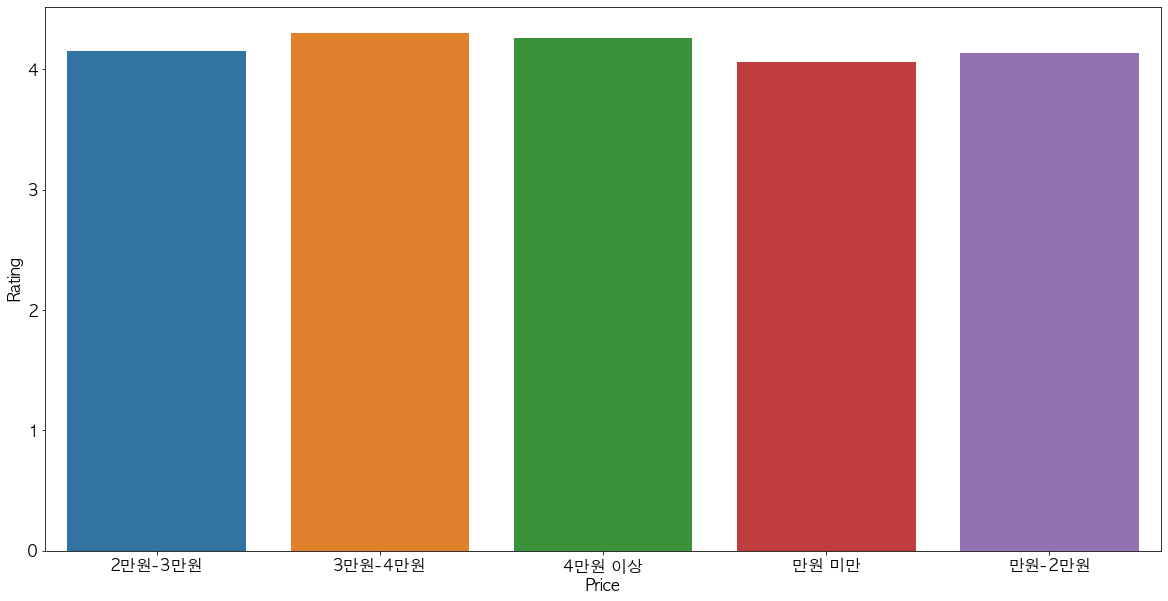

In [30]:
df100 = pd.DataFrame(a2)
df100.reset_index(inplace=True)

sns.barplot(data=df100, x='Price', y='Rating')
plt.show()